In [1]:
from hdf5storage import loadmat, savemat 
import numpy as np 
import networkx as nx

In [6]:
# load coh or pcoh
pcoh=loadmat('../../Cleaned_data/hilbert_datacov/Pcoh_all.mat')
pcoh_all=pcoh['Pcoh_all']
np.shape(pcoh_all)
x = np.mean(pcoh_all.reshape(12*2*12,5,448,448),axis = 0)

In [2]:
pcoh_boolean=loadmat('../../Cleaned_data/hilbert_datacov/Pcoh_boolean.mat')
pcoh_boolean.keys()
Pcoh_boolean=pcoh_boolean['Pcoh_boolean']
np.shape(Pcoh_boolean)
x = np.mean(Pcoh_boolean.reshape(12*2*12,5,448,448),axis = 0)

In [11]:
pcoh=loadmat('/ssd/zhibin/Cleaned_sourcedata/cortical_source_data/python_lasso/Pcoh_lasso.mat')
Pcoh_lasso=pcoh['Pcoh_lasso']
np.shape(Pcoh_lasso)
x = np.mean(Pcoh_lasso.reshape(12*2*12,5,448,448),axis = 0)


In [10]:
sc = loadmat('../../Cleaned_data/hilbert_datacov/SC.mat')['SC']
lp = loadmat('../plot_source_ROIs/labels_positions.mat')

In [ ]:
coh = loadmat('../../Cleaned_data/hilbert_datacov/coh_all.mat')
coh.keys()
coh_all = coh['coh_all']
np.shape(pcoh_all)
x = np.mean(coh_all.reshape(12*2*12,5,448,448),axis = 0)

In [6]:
x = np.mean(Pcoh_boolean.reshape(12*2*12,5,448,448),axis = 0)
y = np.mean(x,axis = 0)

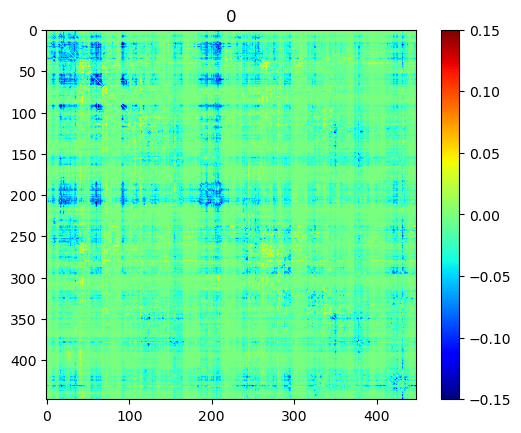

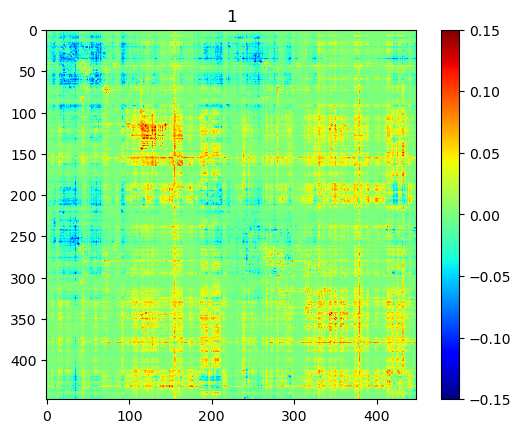

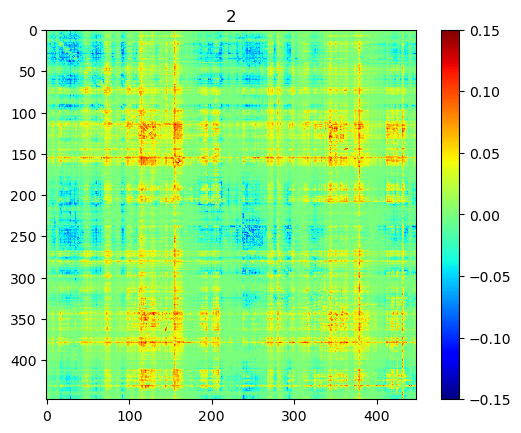

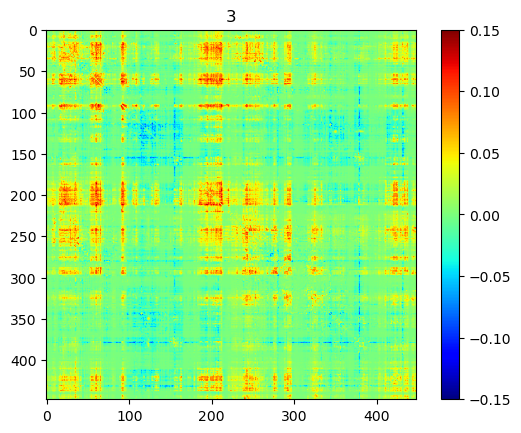

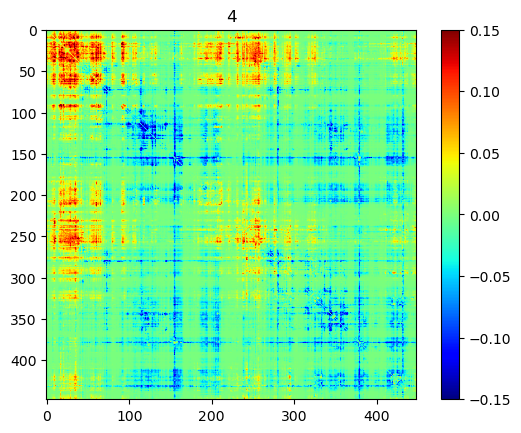

In [10]:
from matplotlib import pyplot as plt
for j in range(5):
    plt.figure()
    # plt.imshow(x[j,:,:],vmin = 0,vmax = 1,cmap= 'jet')
    # plt.imshow(x[j,:,:],vmin = -0.001,vmax = 0.001,cmap= 'jet')
    plt.imshow((x[j,:,:]-y),vmin = -0.15,vmax = 0.15,cmap= 'jet')
    plt.colorbar()
    plt.title(j)

In [13]:
Brain = lp['Brain']
source_coor  = lp['corti_ave_source_coor']
source_label = lp['corti_ave_source_labl']
fc = lp['fc']
roiNames = lp['roiNames_250']

In [43]:
dg_ctr_all=np.zeros((12,2,12,5,448))
for ses in range(12):
    for subj in range(2):
        for tr in range(12):
            for freq in range(5):
                G= nx.from_numpy_array(Pcoh_boolean[ses][subj][tr,freq,:,:])
                dg_ctr=nx.degree_centrality(G)
                dg_ctr_all[ses,subj,tr,freq,:]=np.array(list(dg_ctr.values()))
# 34 s


In [49]:
outdict=dict()
outdict['dg_ctr_all']=dg_ctr_all
savemat('dg_ctr_all.mat',outdict)